### <b> Gaussian Naive Bayes Classifier/Classification </b>

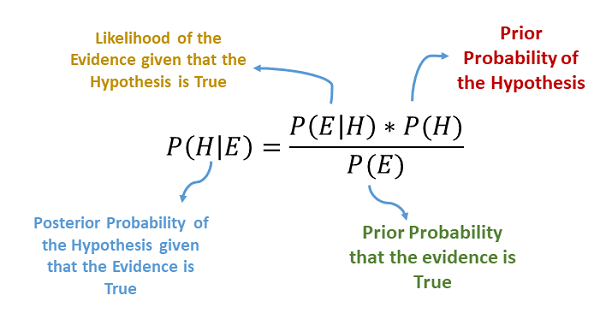
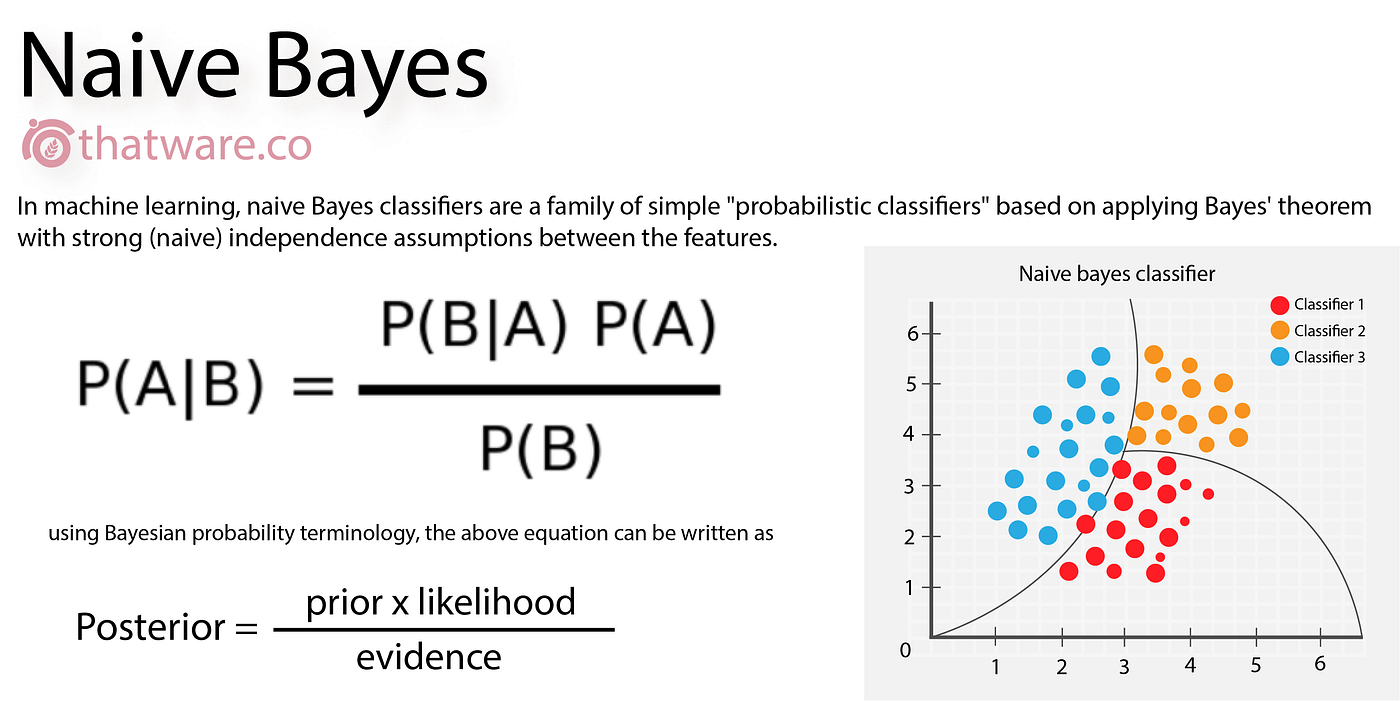
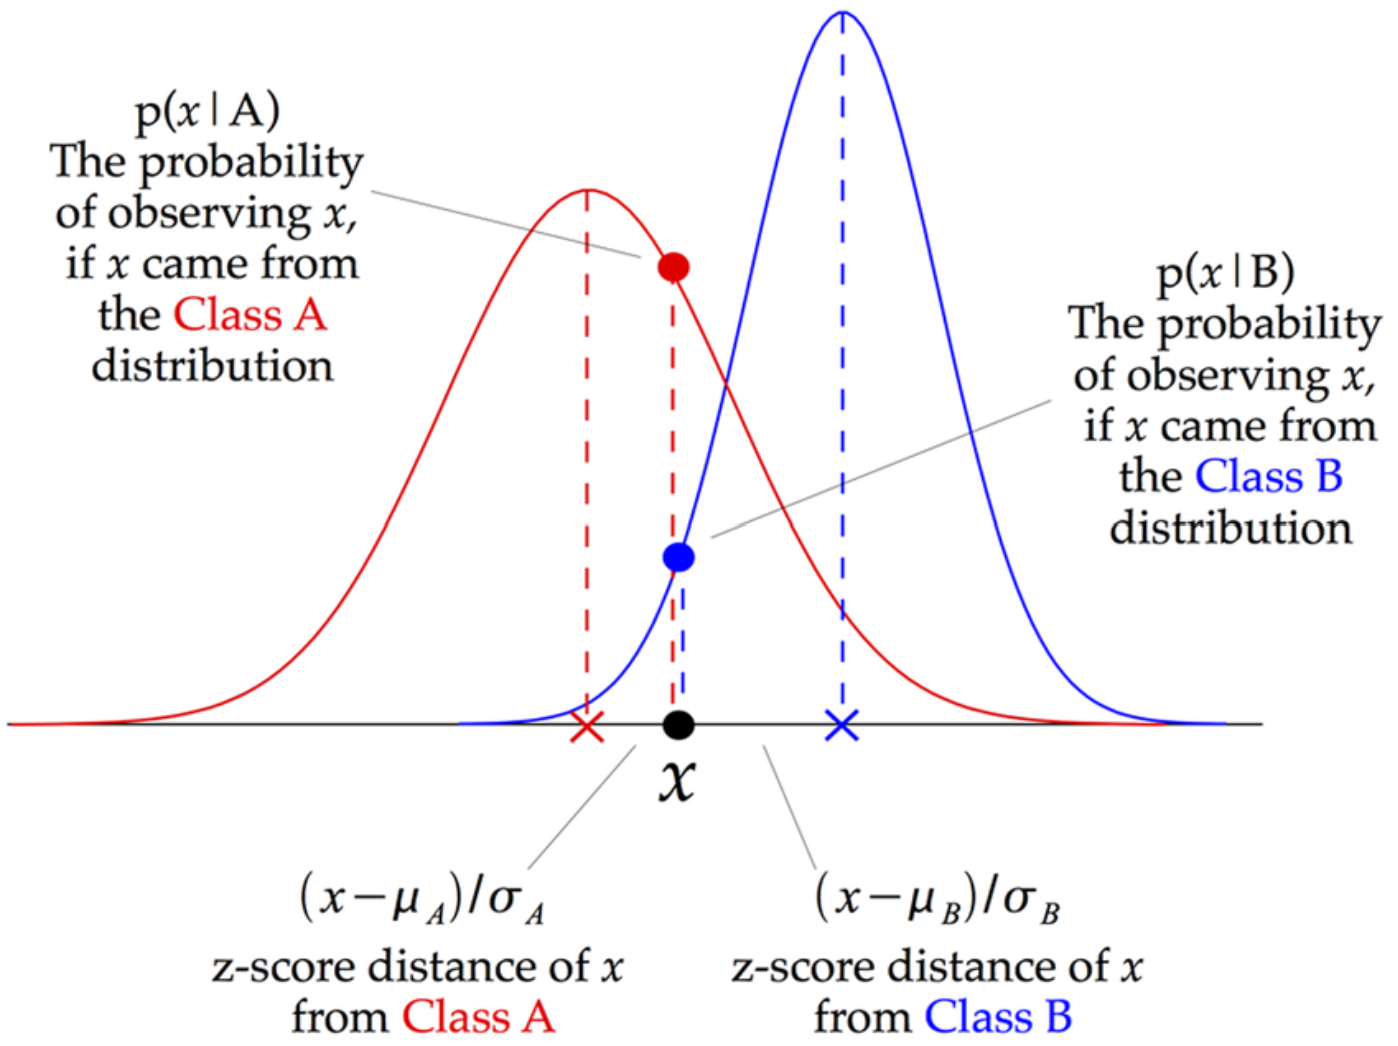
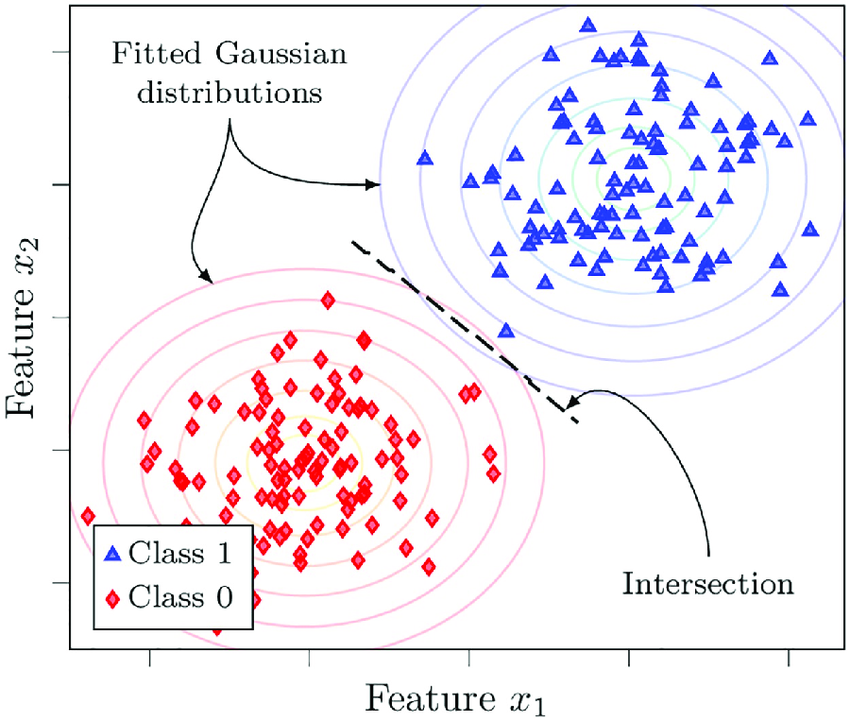
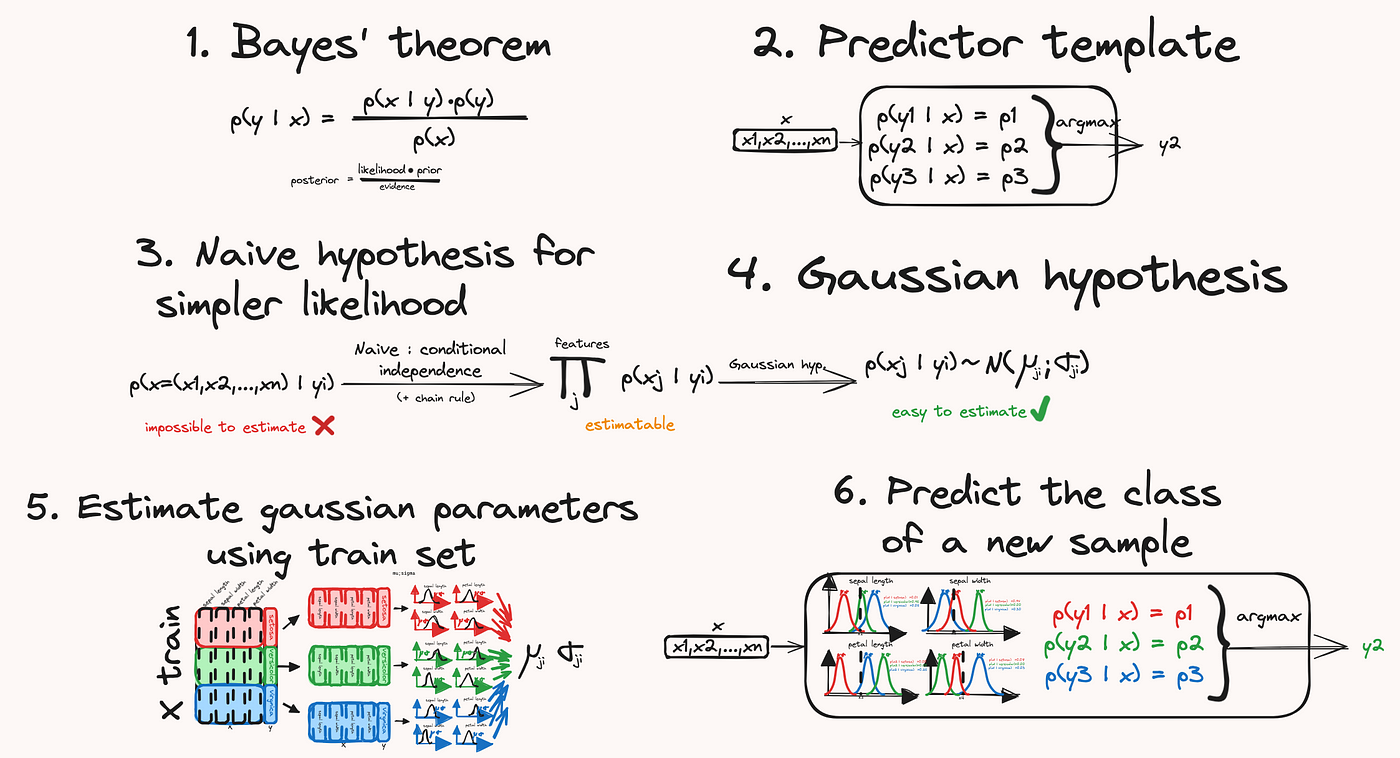
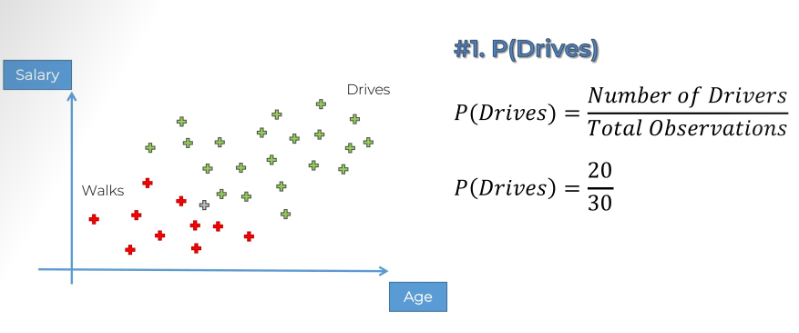
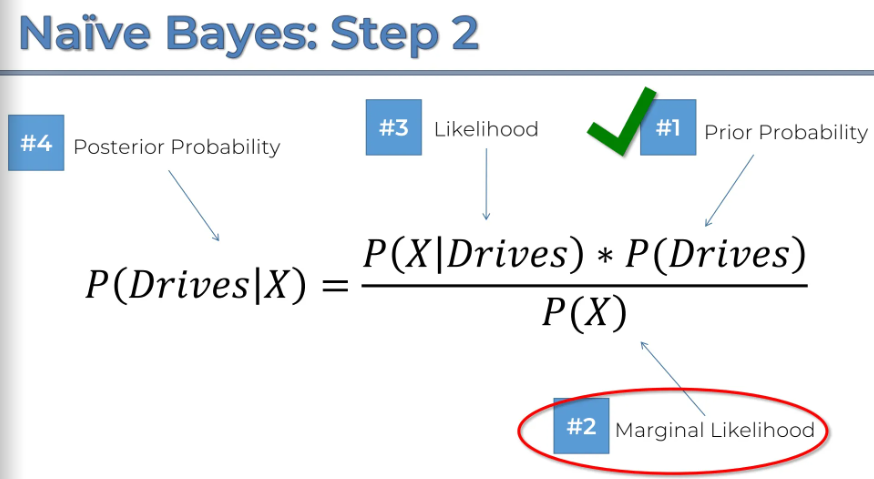
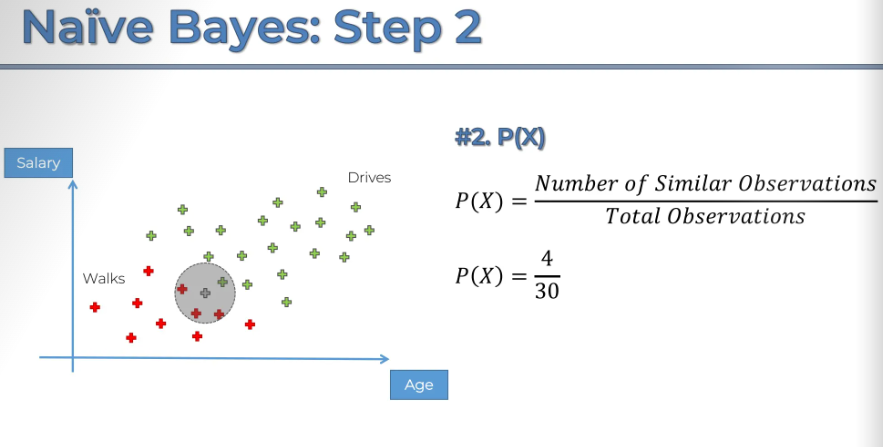
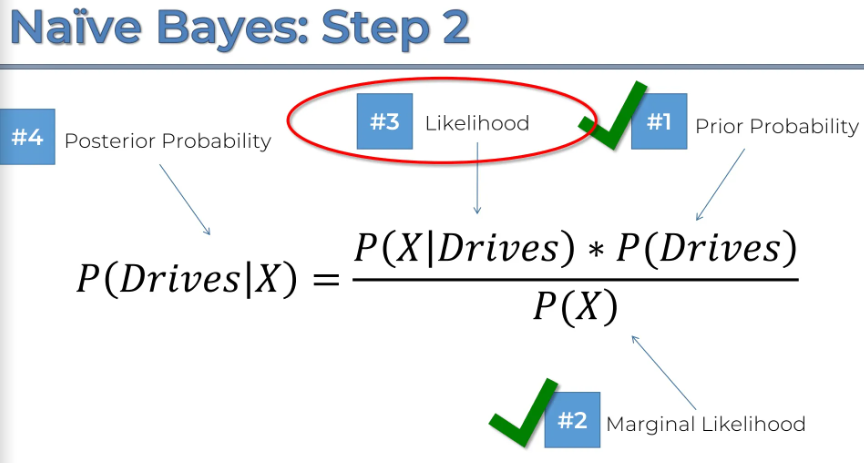
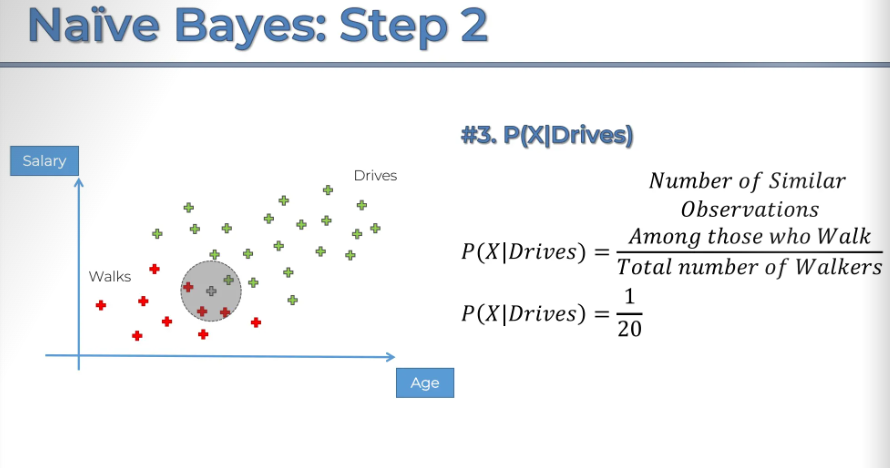
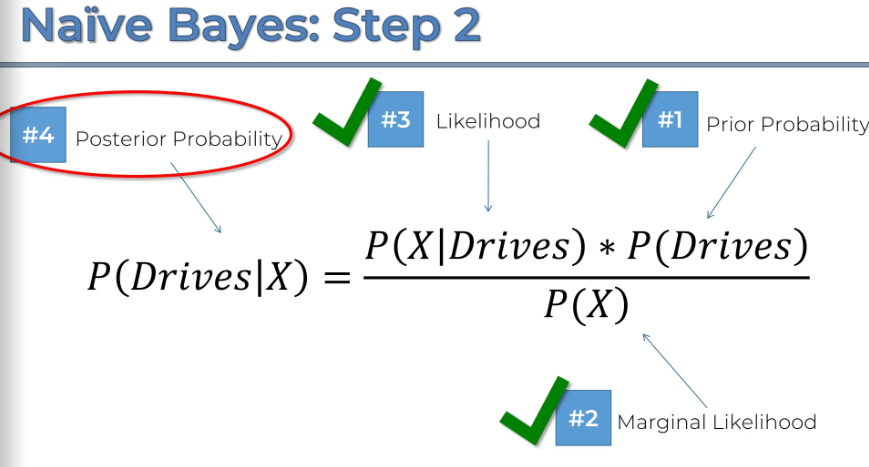
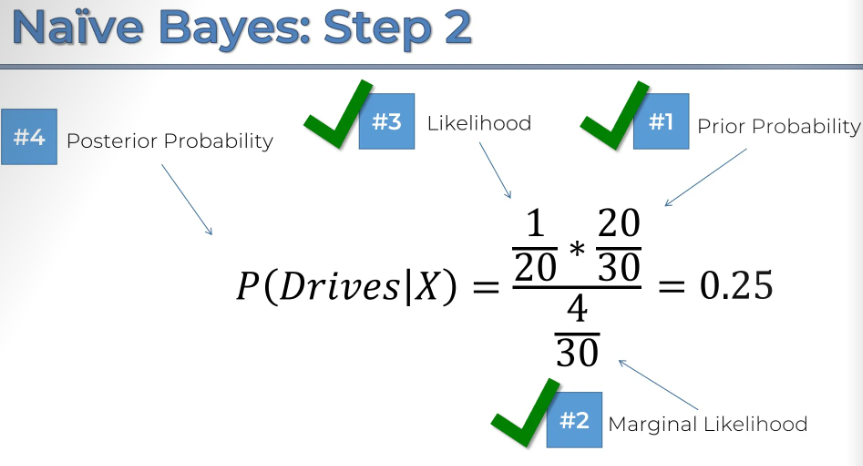

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [7]:
dataset = pd.read_csv("Social_Network_Ads.csv")

print(f"Dataset: \n{dataset}\n")

description = dataset.describe()

print(f"Description: \n{description}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Dataset: 
     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

Description: 
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

X: 
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  7

In [8]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

print(f"X_train: \n{X_train}")
print(f"X_test: \n{X_test}")

X_train: 
[[ 0.31161548 -0.5423128 ]
 [ 0.31161548 -0.33828971]
 [-0.98936367  0.53609495]
 [-1.17521784  0.47780264]
 [-1.26814492 -0.36743587]
 [ 1.89137589 -1.38755131]
 [ 1.89137589 -0.95035897]
 [ 1.42674048 -1.0669436 ]
 [-1.08229076  0.27377955]
 [-0.24594701  2.22657197]
 [-1.26814492 -1.27096668]
 [-1.54692617 -0.07597431]
 [-1.45399909 -1.27096668]
 [ 1.42674048  0.04061031]
 [ 0.31161548  0.04061031]
 [-0.98936367  1.93511041]
 [-1.08229076 -1.56242824]
 [ 0.86917798 -0.68804358]
 [ 1.89137589  0.71097188]
 [ 1.05503215 -0.16341278]
 [-0.98936367 -0.48402049]
 [-0.24594701  0.5069488 ]
 [-1.63985325 -1.00865128]
 [ 0.03283424  1.23560268]
 [ 0.40454257 -0.16341278]
 [-0.98936367  0.5069488 ]
 [ 0.7762509  -0.33828971]
 [ 0.86917798 -1.18352822]
 [ 0.7762509  -1.24182053]
 [ 1.98430297 -0.83377435]
 [ 1.98430297  0.5069488 ]
 [-1.26814492 -1.12523591]
 [-0.71058243 -0.62975126]
 [ 0.40454257  0.27377955]
 [-0.61765534 -0.07597431]
 [-0.43180118 -0.30914356]
 [ 1.61259464  1.5

In [26]:
gaussian_naive_bayes_classifier = GaussianNB()
gaussian_naive_bayes_classifier.fit(X_train, y_train)

prediction = gaussian_naive_bayes_classifier.predict(standard_scaler.transform(
    [
        [27, 84000]
    ]
))

print(f"1. Prediction for (27 Age, 84000 Salary): {prediction}\n")

y_predicted = gaussian_naive_bayes_classifier.predict(X_test)

print(f"2. Predicted: \n{y_predicted}\n")

confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print(f"3. Confusion matrix result: \n{confusion_matrix_result}\n")

accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_predicted)

print(f"4. Accuracy score: {accuracy_score_result}\n")

classification_report_result = classification_report(y_true = y_test, y_pred = y_predicted)

print(f"5. Classification report result: \n{classification_report_result}\n")

1. Prediction for (27 Age, 84000 Salary): [0]

2. Predicted: 
[0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0]

3. Confusion matrix result: 
[[57  6]
 [12 25]]

4. Accuracy score: 0.82

5. Classification report result: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        63
           1       0.81      0.68      0.74        37

    accuracy                           0.82       100
   macro avg       0.82      0.79      0.80       100
weighted avg       0.82      0.82      0.82       100




In [ ]:
X_set, y_set = standard_scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, gaussian_naive_bayes_classifier.predict(standard_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Gaussian Naive Bayes Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\PanCh\AppData\Local\Temp\ipykernel_1172\2688836338.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


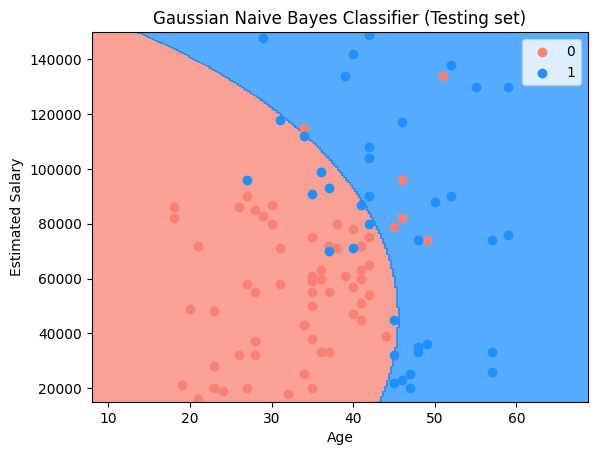

In [29]:
X_set, y_set = standard_scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, gaussian_naive_bayes_classifier.predict(standard_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Gaussian Naive Bayes Classifier (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()